## Importação dos módulos necessário para executar o script

In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from collections import namedtuple

## Comando para plotar os gráficos dentro do notebook

In [4]:
%matplotlib inline

## Implementações de Funções usadas no script

In [5]:
def carrega_dados(caminho_arquivo: str) -> pd.DataFrame:
    """
    Cria um data frame a partir de um arquivo csv indicado pelo
    argumento caminho_arquivo.
    """
    
    return pd.read_csv(caminho_arquivo)

## Script para a construção do modelo

### carregamentos dos dados

In [6]:
## lê os dados do arquivo Sprint3 Diabetes.csv
df_diabetes = carrega_dados('Sprint3 Diabetes.csv')

### pré-processamento dos dados

In [7]:
## faz a remoção de linhas duplicadas e valores ausentes
df_diabetes.drop_duplicates(inplace=True)
df_diabetes.dropna(inplace=True)

## não há campos com texto
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

### análise da correlção das variáveis com a variável alvo

In [8]:
matriz_correlacao = df_diabetes.corr()
print(matriz_correlacao['Diabetes_012'].sort_values(ascending=False))

Diabetes_012            1.000000
GenHlth                 0.284881
HighBP                  0.261976
BMI                     0.212027
DiffWalk                0.210638
HighChol                0.203327
Age                     0.184642
HeartDiseaseorAttack    0.170816
PhysHlth                0.160485
Stroke                  0.100276
CholCheck               0.075701
MentHlth                0.057698
Smoker                  0.046774
Sex                     0.032243
AnyHealthcare           0.024911
NoDocbcCost             0.023568
Fruits                 -0.025462
Veggies                -0.043446
HvyAlcoholConsump      -0.067164
PhysActivity           -0.103408
Education              -0.107742
Income                 -0.147102
Name: Diabetes_012, dtype: float64


In [9]:
## selecionamos apenas as variáveis com coeficiente de correlação acima de 0.2
variaveis_candidatas =  matriz_correlacao[matriz_correlacao['Diabetes_012'] > 0.2].index.to_list()
variaveis_candidatas.remove('Diabetes_012')
print(variaveis_candidatas)

['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk']


### atribuição das variáveis preditores e alvo

In [10]:
X = df_diabetes[variaveis_candidatas]
y = df_diabetes['Diabetes_012']

In [11]:
X.head()

,HighBP,HighChol,BMI,GenHlth,DiffWalk
0,1.0,1.0,40.0,5.0,1.0
1,0.0,0.0,25.0,3.0,0.0
2,1.0,1.0,28.0,5.0,1.0
3,1.0,0.0,27.0,2.0,0.0
4,1.0,1.0,24.0,2.0,0.0


### treinamento do modelo

In [12]:
## separação dos dados em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
## Como queremos avaliar o K-NN para diferentes valores de k, então
## iremos treinar modelos com valores de k para 3,5,...,13. Para isso,
## vamos criar uma lista, onde cada elemento dessa lista é uma instância
## do K-NN.

In [14]:
k_min = 3
k_max = 13
## o passo é o valor somado para produzir o próximo elemento da
## sequência produzida pelo range
passo = 2

knn_modelos = [KNeighborsRegressor(n_neighbors=k)
               for k in range(k_min, k_max +passo, passo)]

In [15]:
## Para cada modelo iremos computar o MAE e o RMSE

In [ ]:
k_corrente = k_min
passo = 2
k_previsto = []
valor_mae = []
valor_rmse = []

for modelo in knn_modelos:
    modelo.fit(X_train, y_train)
    y_previsto = modelo.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_previsto)
    mse = metrics.mean_squared_error(y_test, y_previsto)
    rmse = np.sqrt(mse)
    k_previsto.append(k_corrente)
    valor_mae.append(mae)
    valor_rmse.append(rmse)
    k_corrente += passo

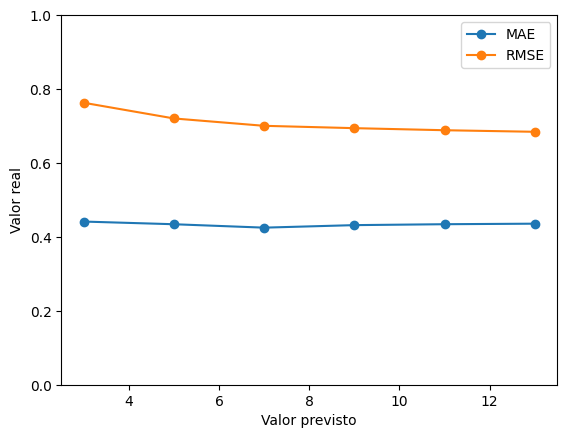

In [17]:
figura, eixo = plt.subplots()
eixo.plot(k_previsto,
          valor_mae,
          marker='o',
          label='MAE')
eixo.plot(k_previsto,
          valor_rmse,
          marker='o',
          label='RMSE')
eixo.set_xlabel('Valor previsto')
eixo.set_ylabel('Valor real')
plt.ylim([0,1])
eixo.legend()
plt.show()